<a href="https://colab.research.google.com/github/KaueAbbe/Case_Fraude/blob/main/Machine_Learning/Fraude_Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size = 7 color = 'green'> Caso de Fraude - Modelo de Classificação</font>


##**Objetivo do Case**
Neste case atuarei como analista e cientista de dados, adquirindo e gerando informações sobre casos de compras fradulentas.

Como analista e cientista de dados dessa empresa passarei por todo processo de limpeza dos dados, análise exploratória e criação de um modelo de Machine Leaning para classificar possíveis compras como fraudes. O objetivo da empresa é compreender as fraudes, adquirir informações valiosas sobre e classificar compras como fraudulentas ou não.

##**Objetivos Modelo de Classificação**
1. Analisar correlação e Multicolinearidade, retirar dados altamente correlacionados
2. Criar uma baseline
3. Separar os dados em treino, teste e validação
4. Criar uma Pipeline para criar o modelo:
* Pipeline deverá realizar o pré-processamento
* Pipeline deverá testar diferentes modelos de classificação
5. Treinar os modelos com validação cruzada
6. Testar todos os modelos com métrica escolhida
7. Otimizar melhor modelo de teste
8. Comparar métricas entre modelo novo e modelo antigo.
9. Comparar métricas de Bussines entre modelo novo e antigo
# Importar bibliotecas e dados tratados

In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 2.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import category_encoders as ce

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate, KFold



from sklearn.metrics import recall_score, f1_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV

import pickle


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Python/Case/Dados_Case1_tratados.csv')
df.head(3)

,score_1,score_2,score_3,score_4,score_5,score_6,pais,score_7,produto,categoria_produto,...,score_fraude_modelo,fraude,score_2_faltante,score_3_faltante,score_4_faltante,score_6_faltante,pais_faltante,score_9_faltante,score_10_faltante,entrega_doc_2_faltante
0,4,0.7685,94436.24,20.0,0.444828,1.0,BR,5,Máquininha Corta Barba Cabelo Peito Perna Pelo...,cat_8d714cd,...,66,0,0,0,0,0,0,0,0,1
1,4,0.7550,9258.50,1.0,0.000000,33.0,BR,0,Avental Descartavel Manga Longa - 50 Un. Tnt ...,cat_64b574b,...,72,0,0,0,0,0,0,0,0,0
2,4,0.7455,242549.09,3.0,0.000000,19.0,AR,23,Bicicleta Mountain Fire Bird Rodado 29 Alumini...,cat_e9110c5,...,95,0,0,0,0,0,0,0,0,1


### Correlação e Multicolinearidade

<ipython-input-5-51cc52586e95>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop(['score_fraude_modelo'], axis = 1).corr())


<Axes: >

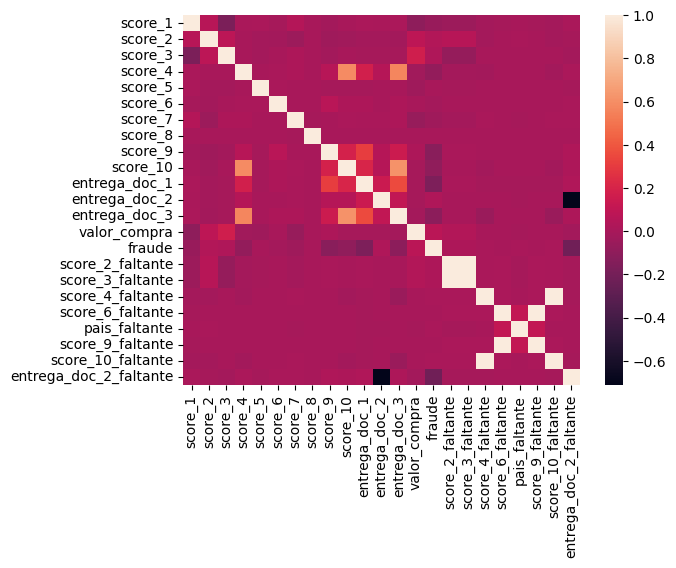

In [ ]:
sns.heatmap(df.drop(['score_fraude_modelo'], axis = 1).corr())

In [ ]:
df = df.drop(['score_3_faltante', 'score_10_faltante', 'score_9_faltante'], axis = 1)

<ipython-input-7-51cc52586e95>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop(['score_fraude_modelo'], axis = 1).corr())


<Axes: >

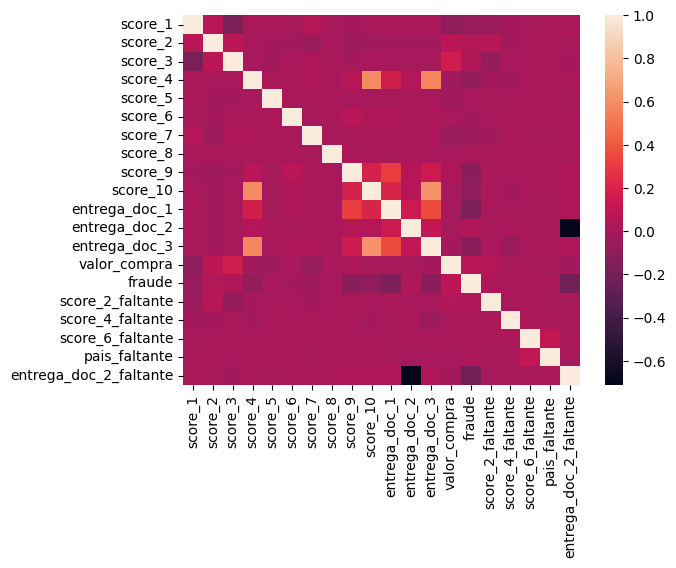

In [ ]:
sns.heatmap(df.drop(['score_fraude_modelo'], axis = 1).corr())

# Pré-processamento de dados

1. Lidar com valores categóricos (pais, categoria_produto)
2. Escalonamento dos dados
3. Retirar colunas que prejudiquem o modelo
4. Observar correlação e Multicolineriadade

# Criando Pipeline

In [ ]:
X = df.drop(['fraude','score_fraude_modelo','data_compra','produto'], axis = 1)
Y = df['fraude']

In [ ]:
X, Y = RandomOverSampler().fit_resample(X, Y)

* Realizei o OverSampler pois não há dados suficientes para realizar o UnderSampler. Caso fizesse perderia muitos dados importantes para a classificação

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print(x_treino.shape, x_teste.shape)
print(y_treino.shape, y_teste.shape)
print('-----------------------VALIDACAO---------------------')
x_teste, x_validacao, y_teste, y_validacao = train_test_split(x_teste, y_teste, test_size = 0.25, random_state = 42)
print(x_teste.shape, x_validacao.shape)
print(y_teste.shape, y_validacao.shape)

(228000, 21) (57000, 21)
(228000,) (57000,)
-----------------------VALIDACAO---------------------
(42750, 21) (14250, 21)
(42750,) (14250,)


In [ ]:
colunas_encode = ['pais', 'categoria_produto']
encode = ce.WOEEncoder(cols = colunas_encode, return_df = True)


# Definição da Baseline

* Como já temos na empresa um modelo antigo, temos a Métrica do Recall deste modelo. Vamos utilizar como Baseline o Recall do Modelo antigo.Este valor foi calculado na EDA.

Baseline Recall: 73.72

## Pipeline Para diversos Modelos

In [ ]:
#Criando Passos de Pre processamento
preprocessamento_passos = [  ]  # Pré-processamento numérico

## Crie o transformador de colunas
transformador_coluna = ColumnTransformer(
    transformers=[
        ('woe', encode, colunas_encode)  # Aplicar WoE às colunas categóricas
    ],
    remainder='passthrough'  # Passar todas as outras colunas sem modificação
)


# Crie o pipeline para o pré-processamento
preprocessamento_pipeline = Pipeline(preprocessamento_passos)

# Combine o pipeline de pré-processamento com o transformador de colunas
preprocessamento_pipeline.steps.append(('column_transformer', transformador_coluna))

preprocessamento_pipeline.steps.append(('scaler', StandardScaler()))

#Definindo Modelos
modelos = [
    ('Random Forest', RandomForestClassifier(max_depth = 5)),
    ('Gradient Boost', GradientBoostingClassifier()),
    ('Tree', DecisionTreeClassifier(max_depth = 5)),
    ('Logistic Regression', LogisticRegression()),
    ('Bernoulli',BernoulliNB()),
    ('AdaBoost',AdaBoostClassifier())
]
results = {}

Fold = KFold(n_splits = 5, shuffle = True, random_state = 42)

for nome_modelo, modelo in modelos:


  # Combine tudo em um único pipeline
  pipeline_completa = Pipeline([
      ('preprocessing', preprocessamento_pipeline),
      ('model', modelo)
  ])


  scoring = {'recall': make_scorer(recall_score)}

  # Execute a validação cruzada
  cv_results = cross_validate(pipeline_completa, x_treino, y_treino, scoring=scoring, cv=Fold)


  pipeline_completa.fit(x_treino, y_treino)
  print(nome_modelo)
  print(f"Recall de Treinamento: {cv_results['test_recall'].mean()} --- {cv_results['test_recall'].std()}")
  # Faça previsões no conjunto de teste
  y_pred = pipeline_completa.predict(x_teste)

  recall = recall_score(y_teste, y_pred)
  f1 = f1_score(y_teste, y_pred)
  print(f'{nome_modelo} - Recall: {recall} - F1: {f1}')
  print('---------------------------------------------- \n')

Random Forest
Recall de Treinamento: 0.7949908388978675 --- 0.00453339129279424
Random Forest - Recall: 0.8003740939911153 - F1: 0.7957784131854848
---------------------------------------------- 

Gradient Boost
Recall de Treinamento: 0.8172724694689595 --- 0.003538294376048805
Gradient Boost - Recall: 0.8208557400046762 - F1: 0.8085488588471017
---------------------------------------------- 

Tree
Recall de Treinamento: 0.7753231152885981 --- 0.028996296060826897
Tree - Recall: 0.7798456862286649 - F1: 0.7879145799867713
---------------------------------------------- 

Logistic Regression
Recall de Treinamento: 0.7885301289005506 --- 0.003502060832868532
Logistic Regression - Recall: 0.7916764086976853 - F1: 0.7916208823323125
---------------------------------------------- 

Bernoulli
Recall de Treinamento: 0.7570665748447272 --- 0.0037587892920353393
Bernoulli - Recall: 0.7560907177928454 - F1: 0.7537116886143805
---------------------------------------------- 

AdaBoost
Recall de Tre

# Otimização do Melhor Modelo: Gradient Boost

In [ ]:
#Criando Passos de Pre processamento
preprocessamento_passos = [  ]  # Pré-processamento numérico

## Crie o transformador de colunas
transformador_coluna = ColumnTransformer(
    transformers=[
        ('woe', encode, colunas_encode)  # Aplicar WoE às colunas categóricas
    ],
    remainder='passthrough'  # Passar todas as outras colunas sem modificação
)


# Crie o pipeline para o pré-processamento
preprocessamento_pipeline = Pipeline(preprocessamento_passos)

# Combine o pipeline de pré-processamento com o transformador de colunas
preprocessamento_pipeline.steps.append(('column_transformer', transformador_coluna))

preprocessamento_pipeline.steps.append(('scaler', StandardScaler()))

#Definindo Modelos
modelos = [
    ('Gradient Boost', GradientBoostingClassifier())
]
results = {}

Fold = KFold(n_splits = 5, shuffle = True, random_state = 42)

for nome_modelo, modelo in modelos:


  # Combine tudo em um único pipeline
  pipeline_completa = Pipeline([
      ('preprocessing', preprocessamento_pipeline),
      ('model', modelo)
  ])


  scoring = {'recall': make_scorer(recall_score)}

  # Defina a grade de hiperparâmetros a ser otimizada (exemplo para Random Forest)
  param_grid = {
      'model__loss': ['log_loss', 'exponential'],
      'model__learning_rate': [0.1, 0.2],
      'model__n_estimators': [x for x in range(99, 101)],
      'model__max_depth': [3, 5],
      'model__random_state' : [42]
  }

  # Execute a validação cruzada
  grid_search = RandomizedSearchCV(pipeline_completa, param_grid, scoring='recall', cv=Fold, refit = 'recall')


  grid_search.fit(x_treino, y_treino)
  print(nome_modelo)
  print(f'{nome_modelo} - Best Parameters: {grid_search.best_params_}')
  results[nome_modelo] = grid_search.best_score_

for model_name, score in results.items():
    print(f'{model_name} - Cross-Validation Recall: {score:.4f}')

Gradient Boost
Gradient Boost - Best Parameters: {'model__random_state': 42, 'model__n_estimators': 100, 'model__max_depth': 5, 'model__loss': 'log_loss', 'model__learning_rate': 0.2}
Gradient Boost - Cross-Validation Recall: 0.8619


# Pipeline do Modelo Otimizado:
* Após otimizar o modelo, obtive os hiperparâmetros que vou utilizar para ter o modelo final.

Gradient Boost
Recall de Treinamento: 0.8619154536437084 --- 0.002767231320040839
Gradient Boost - Recall: 0.8631283610007014 - F1: 0.8458630249982815
---------------------------------------------- 



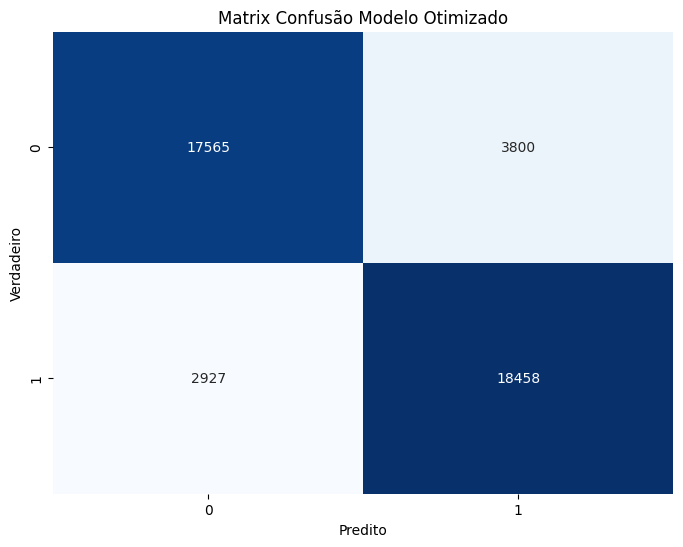

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
#Criando Passos de Pre processamento
preprocessamento_passos = [  ]  # Pré-processamento numérico

## Crie o transformador de colunas
transformador_coluna = ColumnTransformer(
    transformers=[
        ('woe', encode, colunas_encode)  # Aplicar WoE às colunas categóricas
    ],
    remainder='passthrough'  # Passar todas as outras colunas sem modificação
)


# Crie o pipeline para o pré-processamento
preprocessamento_pipeline = Pipeline(preprocessamento_passos)

# Combine o pipeline de pré-processamento com o transformador de colunas
preprocessamento_pipeline.steps.append(('column_transformer', transformador_coluna))

preprocessamento_pipeline.steps.append(('scaler', StandardScaler()))

#Definindo Modelos
modelos = [
    ('Gradient Boost', GradientBoostingClassifier())
]
results = {}

Fold = KFold(n_splits = 5, shuffle = True, random_state = 42)


# Combine tudo em um único pipeline
pipeline_completa = Pipeline([
    ('preprocessing', preprocessamento_pipeline),
    ('model', GradientBoostingClassifier(random_state= 42, n_estimators= 100, max_depth= 5, loss= 'log_loss', learning_rate= 0.2))
])


scoring = {'recall': make_scorer(recall_score)}

# Execute a validação cruzada
cv_results = cross_validate(pipeline_completa, x_treino, y_treino, scoring=scoring, cv=Fold)


pipeline_completa.fit(x_treino, y_treino)
print(nome_modelo)
print(f"Recall de Treinamento: {cv_results['test_recall'].mean()} --- {cv_results['test_recall'].std()}")
# Faça previsões no conjunto de teste
y_pred = pipeline_completa.predict(x_teste)

recall = recall_score(y_teste, y_pred)
f1 = f1_score(y_teste, y_pred)
print(f'{nome_modelo} - Recall: {recall} - F1: {f1}')
print('---------------------------------------------- \n')
cm = confusion_matrix(y_teste, y_pred)
plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matrix Confusão Modelo Otimizado')
plt.show()



1. Validação: Recall = 87%
Este valor mostra que o modelo novo é melhor que o modelo antigo. Vamos avaliar agora quais diferenças este modelo irá trazer para os custos da empresa, e como ele se diferencia do modelo antigo

# Comprações com modelo antigo

<Figure size 1200x800 with 0 Axes>

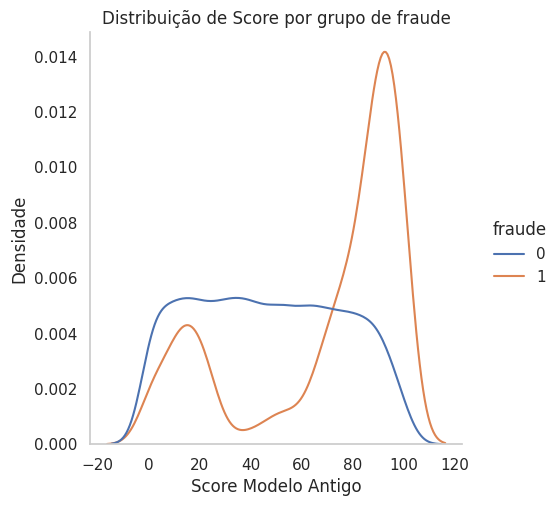

In [ ]:
balanced_data = pd.concat([
    df[df['fraude'] == 0].sample(df['fraude'].sum()),
    df[df['fraude'] == 1]
])
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

sns.displot(data = balanced_data,x = 'score_fraude_modelo', hue = 'fraude', kind =  'kde')

plt.xlabel('Score Modelo Antigo')
plt.ylabel('Densidade')
plt.title('Distribuição de Score por grupo de fraude')
plt.grid(False)
plt.show()

* Percebe-se neste gráfico que a distribuição de score para os grupos se cruzam bastante. Não há um ponto de seperação delimitado.

In [ ]:
balenced_data_N = pd.DataFrame({'fraude':y_validacao, 'score_modelo_novo':pipeline_completa.predict_proba(x_validacao).T[1]})

<Figure size 1200x800 with 0 Axes>

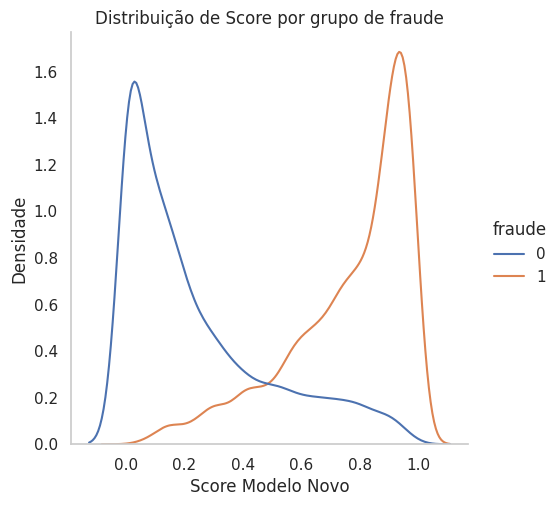

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))


sns.displot(data = balenced_data_N,x = 'score_modelo_novo', hue = 'fraude', kind =  'kde')

plt.xlabel('Score Modelo Novo')
plt.ylabel('Densidade')
plt.title('Distribuição de Score por grupo de fraude')
plt.grid(False)
plt.show()

* Percebe-se neste gráfico que atingimos um ponto de separação importante, próximo de 0.5. É importante avaliarmos agora qual o ponto de Threashhold para este modelo que aumente os lucros da empresa.

In [ ]:
dados_validacao = x_validacao.copy()
dados_validacao

,score_1,score_2,score_3,score_4,score_5,score_6,pais,score_7,categoria_produto,score_8,...,score_10,entrega_doc_1,entrega_doc_2,entrega_doc_3,valor_compra,score_2_faltante,score_4_faltante,score_6_faltante,pais_faltante,entrega_doc_2_faltante
79677,4,0.7555,43711.655,3.0,0.654473,2.0,BR,8,cat_2b342e6,0.883413,...,81.0,1,1,0,7.73,1,0,0,0,0
181329,2,0.7842,13081.950,37.0,0.000000,13.0,BR,9,cat_41658ff,0.709142,...,181.0,1,0,1,12.81,0,0,0,0,1
216178,4,0.7366,602.150,22.0,0.000000,2.0,BR,1,cat_2f5e8bb,0.691687,...,602.0,1,1,1,29.94,0,0,0,0,0
24582,4,0.7360,477182.740,3.0,0.000000,7.0,AR,16,cat_9f70d7e,0.459334,...,327.0,1,0,1,283.23,0,0,0,0,1
249099,2,0.6396,150565.920,50.0,0.000000,260.0,AR,26,cat_71f63b5,0.704556,...,920.0,1,1,1,29.81,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242470,4,0.5229,168413.390,50.0,0.224332,17.0,US,15,cat_cf3c541,0.940163,...,278.0,1,0,1,23.19,0,0,0,0,1
153557,4,0.7027,52087.370,50.0,0.000000,2.0,BR,2,cat_120b656,0.295137,...,238.0,1,0,1,40.05,0,0,0,0,1
79287,4,0.7885,99532.410,50.0,0.000000,7.0,BR,36,cat_ec170c7,0.897360,...,866.0,1,1,1,32.67,0,0,0,0,0
188596,4,0.8491,122364.860,14.0,0.511568,0.0,BR,6,cat_7d24ff9,0.554054,...,193.0,1,0,0,7.61,0,1,0,0,0


In [ ]:
dados_validacao['score_modelo_novo'] = pipeline_completa.predict_proba(x_validacao).T[1]*100
dados_validacao.head(2)

,score_1,score_2,score_3,score_4,score_5,score_6,pais,score_7,categoria_produto,score_8,...,entrega_doc_1,entrega_doc_2,entrega_doc_3,valor_compra,score_2_faltante,score_4_faltante,score_6_faltante,pais_faltante,entrega_doc_2_faltante,score_modelo_novo
79677,4,0.7555,43711.655,3.0,0.654473,2.0,BR,8,cat_2b342e6,0.883413,...,1,1,0,7.73,1,0,0,0,0,84.866956
181329,2,0.7842,13081.950,37.0,0.000000,13.0,BR,9,cat_41658ff,0.709142,...,1,0,1,12.81,0,0,0,0,1,86.011261


In [ ]:
dados_validacao['fraude'] = y_validacao

1. O Dinheiro que a empresa recebe é 10% da venda, se a venda não for fraude.
2. O dinheiro que a empresa perda é 100% de uma venda fraudulenta.
3. O lucro da empresa é baseado em: O quando a empresa recebo menos a perda por fraudes.

O código abaixo faz essa conta para diversos pontos de threashold.

In [ ]:
lista_valores_ganhos = []
lista_valores_perdidos = []
lista_ganhado_perdido = []
for i in range(1, 100, 1):
  dados_validacao['fraude_modelo_novo'] = (dados_validacao['score_modelo_novo'] > i ).astype(int)
  valor_ganhado = sum(dados_validacao.query('fraude == 0 and fraude_modelo_novo==0')['valor_compra'])*0.1
  lista_valores_ganhos.append(valor_ganhado)

  valor_perdido = sum(dados_validacao.query('fraude == 1 and fraude_modelo_novo==0')['valor_compra'])
  lista_valores_perdidos.append(valor_perdido)

  lista_ganhado_perdido.append(valor_ganhado - valor_perdido)


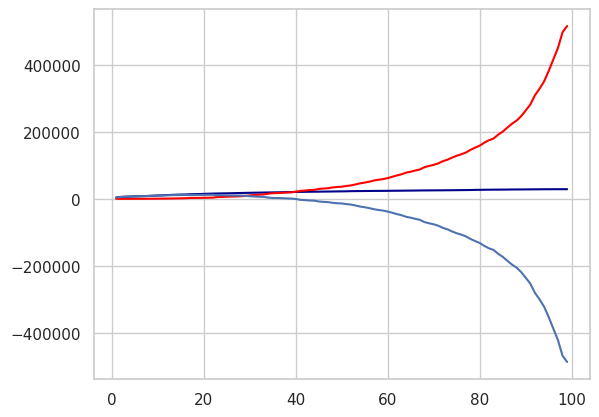

In [ ]:
plt.plot(range(1, 100, 1), lista_valores_ganhos, color = 'darkblue')
plt.plot(range(1, 100, 1), lista_valores_perdidos, color = 'red')
plt.plot(range(1, 100, 1), lista_ganhado_perdido)

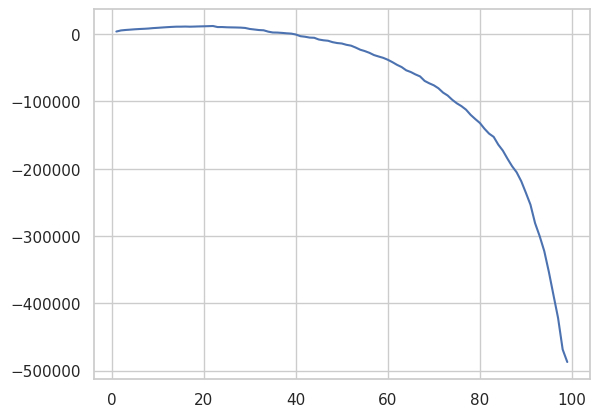

In [ ]:
plt.plot(range(1, 100, 1), lista_ganhado_perdido)

In [ ]:
lista_ganhado_perdido.index(max(lista_ganhado_perdido))

21

In [ ]:
lista_valores_ganhos = []
lista_valores_perdidos = []
lista_ganhado_perdido = []
for i in np.linspace(15, 20, 500):
  dados_validacao['fraude_modelo_novo'] = (dados_validacao['score_modelo_novo'] > i ).astype(int)
  valor_ganhado = sum(dados_validacao.query('fraude == 0 and fraude_modelo_novo==0')['valor_compra'])*0.1
  lista_valores_ganhos.append(valor_ganhado)

  valor_perdido = sum(dados_validacao.query('fraude == 1 and fraude_modelo_novo==0')['valor_compra'])
  lista_valores_perdidos.append(valor_perdido)

  lista_ganhado_perdido.append(valor_ganhado - valor_perdido)

indice = lista_ganhado_perdido.index(max(lista_ganhado_perdido))
valor_indice = np.linspace(15, 20, 500)[indice]
print(f'O ponto de Threashold com maior lucro para a empresa: {valor_indice} ')
print(f'O maior lucro da empresa é de: {lista_valores_perdidos[indice]}')
print(f'O maior lucro da empresa é de: {lista_ganhado_perdido[indice]}')

O ponto de Threashold com maior lucro para a empresa: 20.0 
O maior lucro da empresa é de: 3002.6200000000003
O maior lucro da empresa é de: 11663.023999999998


1. No final, o modelo otimizado tem ponto de treashold igual a **20.00**. Este ponto maximiza os lucros da empresa.
2. O lucro da empresa neste ponto é de: **R$11.663,02**
3. As perdas por compras fraudulentas da empresa diminui de 110954.23 para 3002.62 Uma **diminuição de 97%** nas perdas por aprovação.

# Salvando o modelo

In [ ]:
with open('modelo.pkl', 'wb') as file:
    pickle.dump(pipeline_completa, file)
